In [1]:
from modERec import EnergyRec
import numpy as np
import matplotlib.pyplot as plt

* EnergyRec default values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01




In [2]:
sim_dir = '/mnt/d/Pesquisa/GRAND/simulation/chuv_estrela/80deg/sim009000'
#EnergyRec.f_thres = 1e-3
rec1 = EnergyRec(sim_dir)

rec1.Eval_fluences()
fluence_arr_unc = rec1.fluence_arr

n_ant = len(rec1.GRANDshower.fields)
rec1.shower.R0_R = np.zeros(n_ant) + 1
rec1.Eval_geo_ce_fluences()
fluence_evB_unc = rec1.fluence_evB

rec1.shower.R0_R = None
rec1.Eval_geo_ce_fluences()
fluence_arr = rec1.fluence_arr
fluence_evB = rec1.fluence_evB

* EnergyRec instance starting values summary:
--> bool_plot =  False
--> bool_EarlyLate =  False
--> nu_low =  50
--> nu_high =  200
--> SNR_thres =  10
--> thres_low =  1e-07
--> thres_high =  1
--> f_thres =  0.01
* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


--> Early-late correction ALREADY applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 100 % complete;


--> Early-late correction will be applied 

* Evaluating the fluences:
--> 0 % complete;
--> 10 % complete;
--> 20 % complete;
--> 30 % complete;
--> 40 % complete;
--> 50 % complete;
--> 60 % complete;
--> 70 % complete;
--> 80 % complete;
--> 90 % complete;
--> 

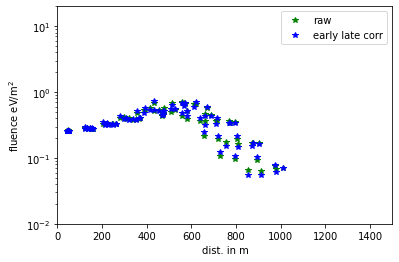

In [3]:
distance = np.linalg.norm((rec1.shower.r_proj - rec1.shower.r_Core_proj)[:,0:2],axis=1)

plt.plot(distance,fluence_arr_unc,"g*",label="raw")
plt.plot(distance,fluence_arr,"b*",label = "early late corr")

plt.ylim(0.01,20)
plt.xlim(0,1500)
plt.gca().set_yscale('log')
plt.xlabel("dist. in m")
plt.ylabel("fluence eV/m$^2$")

plt.legend()

In [4]:
fluence_geo = rec1.fluence_geo
fluence_ce = rec1.fluence_ce

n_ant = len(rec1.GRANDshower.fields)
eB = rec1.GRANDshower.geomagnet.xyz.value/np.linalg.norm(rec1.GRANDshower.geomagnet.xyz.value)
alpha = np.zeros(n_ant) + np.arccos(np.dot(rec1.shower.ev,eB))
distance = np.linalg.norm((rec1.shower.r_proj - rec1.shower.r_Core_proj)[:,0:2],axis=1)
d_Xmax = np.zeros(n_ant) +  np.linalg.norm((rec1.GRANDshower.core - rec1.GRANDshower.maximum).xyz.value)
rho_max = np.zeros(n_ant) + rec1.SymFit.rho(d_Xmax[0],-rec1.shower.ev)

bestfit = rec1.SymFit.a_ratio_fit(fluence_geo, fluence_ce,alpha, distance, d_Xmax, rho_max)
print(rec1.SymFit.a_ratio_chi2(bestfit,fluence_geo, fluence_ce,alpha, distance, d_Xmax, rho_max))
print(bestfit)

1.103356695955895e-05
[3.52481758e-01 7.62600011e+02 8.63623183e-02 2.15011582e-01]


In [5]:
fluence_par = np.zeros(n_ant)

par = bestfit
print(par)
print(rec1.SymFit.a_ratio_chi2(par,fluence_geo, fluence_ce,alpha, distance, d_Xmax, rho_max))
for ant in range(n_ant):
    r_plane = rec1.shower.r_proj[ant][0:2]
    phi = np.arccos(np.dot(r_plane,np.array([1,0]))/np.linalg.norm(r_plane))
    fluence_par[ant] = EnergyRec.SymFit.f_par_geo(fluence_evB[ant],phi,alpha[ant],distance[ant],d_Xmax[ant],par,rho_max[ant])

[3.52481758e-01 7.62600011e+02 8.63623183e-02 2.15011582e-01]
1.103356695955895e-05


-0.009551727260746648 0.01277971789421688


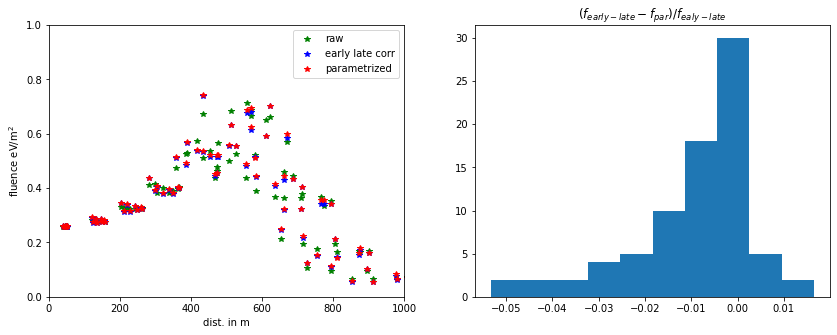

In [11]:
plt.figure(figsize=[14,5])

plt.subplot(121)
plt.plot(distance,fluence_evB_unc,"g*", label="raw")
plt.plot(distance,fluence_evB,"b*", label = "early late corr")
plt.plot(distance,fluence_par,"r*", label = "parametrized")

plt.ylim(0,1)
plt.xlim(0,1000)

plt.xlabel("dist. in m")
plt.ylabel("fluence eV/m$^2$")

plt.legend()

#plt.gca().set_yscale('log')

plt.subplot(122)

diff = (fluence_evB - fluence_par)/fluence_evB
plt.hist(diff,10)
plt.title("($f_{early-late}-f_{par})/f_{ealy-late}$")

print(np.mean(diff),np.std(diff))